# Google Vision API Usage

## Prerequiste Knowledge

### Google Coud Client Libraries

Google Cloud Client Libraries provide authentication, authorization, and accessing each service programmatically. It generates HTTP or RPC requests that call Google Cloud Services.

[Google Cloud Client Libraries](https://cloud.google.com/apis/docs/cloud-client-libraries)

[Client Libraries Explained](https://cloud.google.com/apis/docs/client-libraries-explained)

[Google Cloud Client Libraries: Github](https://github.com/googleapis/google-cloud-python)

### Service Account
Service Account is a special type of account that represent non-human user. It is equivalent to "role" in AWS. 

[Understanding service account](https://cloud.google.com/iam/docs/understanding-service-accounts)

# Installation

Install google-cloud-vision package. 

$ pip install google-cloud-vision

### Sample code reference
https://googleapis.dev/python/vision/latest/index.html

In [25]:
from google.cloud import vision
import pandas as pd
import seaborn as sns
from google.cloud import storage

# Set Parameters
IMAGE_INDEX = 1

# Get images from google cloud storage. 
def storage():
    bucket_name = "vision-ai-experimentation"
    storage_client = storage.Client()
    bucket_gs_link = "gs://vision-ai-experimentation/"

    blobs = storage_client.list_blobs(bucket_name, prefix="images")

    image_links = []
    for blob in blobs:
        if blob.name.endswith(".jpeg"): 
            image_gs_link = bucket_gs_link + blob.name
            image_links.append(image_gs_link)


In [ ]:
## What is Google Vision API

Google Vision API is one of the Google Cloud Services that provides computer vision 

<class 'google.cloud.vision_v1.types.AnnotateImageResponse'>
[('Cat', 0.9959855675697327), ('Mammal', 0.975814163684845)]


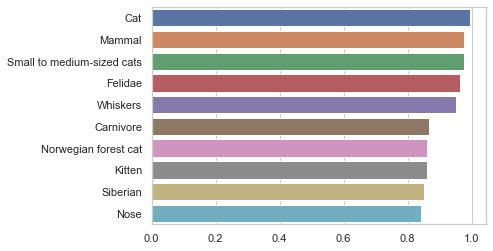

In [26]:
def vision_client():
    """Create vision client."""
    return vision.ImageAnnotatorClient()

    
def annotate_image(vision_client, image_uri, log=False):
    """
    
    Arguments
    ---------
    vision_client : GCP vision client. 
    image_uri     : str
        Call vision API.
        Image resource can be specified only in 3 ways. 
        1. Google Storage
        2. base64 data.
        3. HTTP uri. 
    """

    response = client.annotate_image({
      'image': {
          'source': {
              'image_uri': image_uri
          }
      }
    })
    
    if log:
        print("response : ", response)
        
    return response


def visualization(response):

    # Preprocessing for visualization. 
    descriptions = []
    scores = []
    for label in response.label_annotations:
        descriptions.append(label.description)
        scores.append(label.score)

    dic = {"description": descriptions, "score": scores}

    # Visualization with seaborn. 
    sns.set(style="whitegrid")
    tips = sns.load_dataset("tips")
    sns.barplot(y="description", x="score", data=dic)
    
def extract(response, num=1):
    """Extract top confident annotations.
    
    Arguments
    ---------
    response : google.cloud.vision_v1.types.AnnotateImageResponse
    num      : int
    
    Return
    ------
    top_annotations : tuple list (description, confidence)
    """
    print(type(response))
    top_annotations = []
    for label in response.label_annotations[:num]:
        t = (label.description, label.score)
        top_annotations.append(t)
        
    return top_annotations

if __name__ == "__main__":
    client = vision_client()
    
    image_uri = "https://ichef.bbci.co.uk/news/320/cpsprodpb/AAE7/production/_111515734_gettyimages-1208779325.jpg"
    response = annotate_image(vision_client=client, image_uri=image_uri)
    
    visualization(response)
    
    r = extract(response, num=2)
    print(r)